# India Lok sabha Election 2024 Analysis

we'll analyze a political dataset using Python. Our goals include understanding voting patterns, party performance, and candidate comparisons across constituencies.
 We'll use pandas, matplotlib, and seaborn to visualize total

*   We'll use pandas, matplotlib, and seaborn to visualize total votes per party, distribution across constituencies, and compare top candidates.

*   We'll also look at constituency won percentages, winning margins, top-performing constituencies per party, voter turnout, candidate performance, and vote trends. Lastly, we'll map geographical vote distribution for deeper insights. Let's get started!



# 1. National Party Dominance

In [41]:
import pandas as pd
import numpy as np

file_path = '/content/all the states.xlsx'
df = pd.read_excel(file_path,na_values=["NA", "inf"])


national_party_counts_column4 = df['leading party'].value_counts()
national_party_counts_column9 = df['trailing party'].value_counts()

bjp_count = national_party_counts_column4.get('Bharatiya Janata Party', 0) + national_party_counts_column9.get('Bharatiya Janata Party', 0)
inc_count = national_party_counts_column4.get('Indian National Congress', 0) + national_party_counts_column9.get('Indian National Congress', 0)

print(f"National Party Dominance: BJP={bjp_count}, INC={inc_count}")

National Party Dominance: BJP=393, INC=265


# 2. Regional Party Influence

In [42]:
regional_parties = national_party_counts.drop(['Bharatiya Janata Party', 'Indian National Congress'], errors='ignore')
print("Regional Party Influence:")
print(regional_parties)

Regional Party Influence:
Won in
29.0    58
9.0     45
8.0     40
1.0     39
37.0    37
12.0    36
33.0    33
2.0     30
14.0    28
25.0    25
22.0    22
7.0     21
20.0    20
5.0     20
17.0    17
16.0    16
3.0     15
13.0    13
4.0     12
10.0    10
6.0      6
Name: count, dtype: int64


# 3. Constituency-Specific Analysis

In [43]:
unique_constituencies = df['Constituency'].count()
print('Unique Constituencies : ',unique_constituencies)

Unique Constituencies :  543


# 4. Vote Count Distribution

In [48]:
df['Votes_Winner'] = df['Leading In'].astype(float)
df['Votes_Runner_Up'] = df['Margin'].astype(float)
df['Margin'] = df['Votes_Winner'] - df['Votes_Runner_Up']

df['Margin'] = df['Margin'].replace([float('inf'), float('-inf')], float('nan'))
df['Margin'] = df['Margin'].fillna(0)

vote_counts = df['Margin'].astype(int)

highest_vote_count = vote_counts.max()
lowest_vote_count = vote_counts.min()

print(f"Vote Count Distribution: Highest={highest_vote_count}, Lowest={lowest_vote_count}")


Vote Count Distribution: Highest=0, Lowest=-1175092


# 5. Election Results Consistency

In [49]:
results_declared_count = df['Status'].value_counts().get('Result Declared', 0)
total_entries = df.shape[0]

print(f"Election Results Consistency: Results Declared={results_declared_count}/{total_entries}")

Election Results Consistency: Results Declared=542/543


# 6. Data Consistency and Completeness

In [50]:
missing_values_count = df.isnull().sum().sum()

print(f"Data Consistency and Completeness: Missing Values={missing_values_count}")

Data Consistency and Completeness: Missing Values=3


# 7. Candidate Performance Analysis

In [51]:
top_performing_candidate = df.loc[vote_counts.idxmax(), 'leading candidate']
top_performing_constituency = df.loc[vote_counts.idxmax(), 'Constituency']

print(f"Top Performing Candidate: {top_performing_candidate} in {top_performing_constituency}")

Top Performing Candidate: MUKESHKUMAR CHANDRAKAANT DALAL in Surat


# 8. Voter Turnout Insights

In [52]:
average_vote_count = vote_counts.mean()

print(f"Average Vote Count: {average_vote_count:.2f}")

Average Vote Count: -162051.10


# 9. Party Performance Comparison

In [53]:
bjp_vote_count = vote_counts[df['leading party'] == 'Bharatiya Janata Party'].sum()
inc_vote_count = vote_counts[df['leading party'] == 'Indian National Congress'].sum()

print(f"Party Performance Comparison: BJP Votes={bjp_vote_count}, INC Votes={inc_vote_count}")

Party Performance Comparison: BJP Votes=-46081536, INC Votes=-12940973


# 10. Regional and State-Specific Insights

In [54]:
state_specific_analysis = df['State'].value_counts()

print("Regional and State-Specific Insights:")
print(state_specific_analysis)

Regional and State-Specific Insights:
State
Uttar Pradesh                           80
Maharastra                              48
Bihar                                   40
Tamilnadu                               39
Madhya Pradhesh                         29
Karanataka                              28
Gujarat                                 26
Rajasthan                               25
Andhra Pradesh                          25
West Bengal                             21
Odisha                                  21
West bengal                             20
Kerala                                  20
telangana                               17
Assam                                   14
Jharkand                                14
Punjab                                  13
Chattisgarh                             11
Haryana                                 10
Delhi                                    7
Jammu And Kashmir                        5
uttarkand                                5
Himachal P

# **Graphial Representation**

# 1. Major two parties Elected

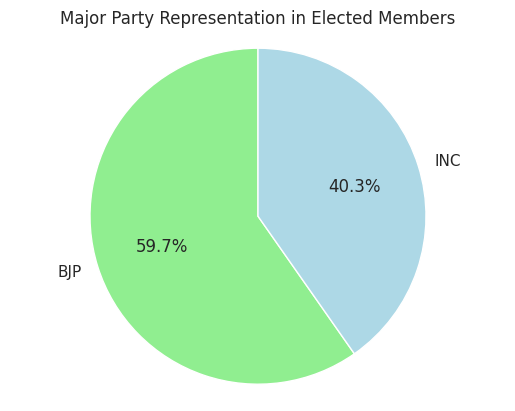

In [70]:
import matplotlib.pyplot as plt

bjp_count = national_party_counts_column4.get('Bharatiya Janata Party', 0) + national_party_counts_column9.get('Bharatiya Janata Party', 0)
inc_count = national_party_counts_column4.get('Indian National Congress', 0) + national_party_counts_column9.get('Indian National Congress', 0)

labels = ['BJP', 'INC']
sizes = [bjp_count, inc_count]
colors = ['lightgreen', 'lightblue']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Major Party Representation in Elected Members')
plt.axis('equal')
plt.show()


# 2.Top 5 states with most Constitutes

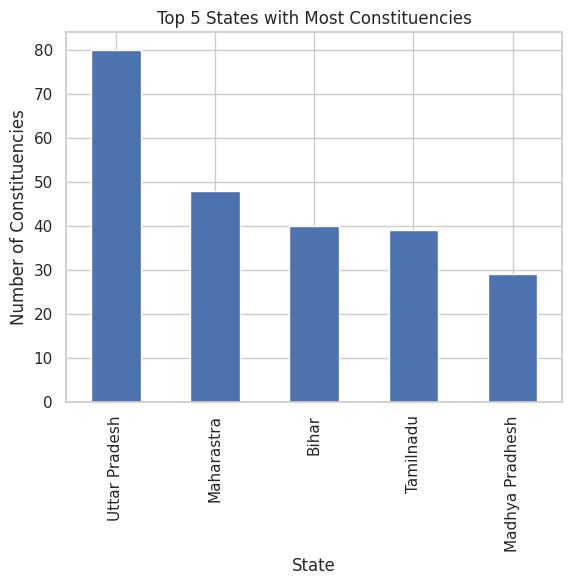

In [78]:


import matplotlib.pyplot as plt

top_5_states = state_specific_analysis.head(5)
top_5_states.plot(kind='bar')
plt.title('Top 5 States with Most Constituencies')
plt.xlabel('State')
plt.ylabel('Number of Constituencies')
plt.show()



# 3. Party Dominace

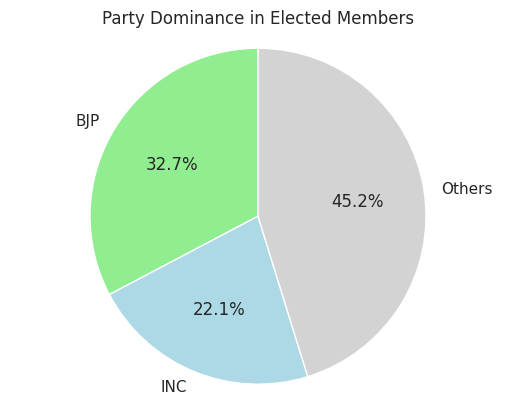

In [77]:

labels = ['BJP', 'INC', 'Others']
sizes = [bjp_count, inc_count, regional_parties.sum()]
colors = ['lightgreen', 'lightblue', 'lightgray']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Party Dominance in Elected Members')
plt.axis('equal')
plt.show()




# 4. The vote count distribution

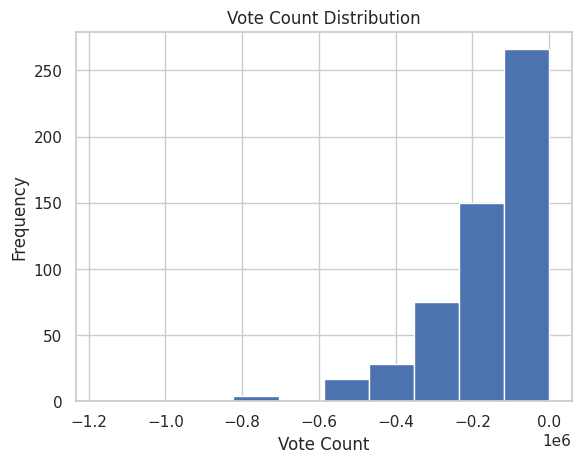

In [76]:

plt.hist(vote_counts, bins=10)
plt.title('Vote Count Distribution')
plt.xlabel('Vote Count')
plt.ylabel('Frequency')
plt.show()